<img src="./images/cads-logo.png" style="height: 100px;" align=left> 
<img src="./images/tf-logo-2.png" style="height: 70px;" align=right>
<img src="./images/keras-logo.png" style="height: 50px;" align=right>

# Artificial Neural Networks

**Pre-requisites:**

1. Python and Pandas Proficiency 
2. Supervised Machine Learning
3. Basic Matrix Operations
4. Linear Alegbra, Calculus


## Course Outline

1. [Introduction](#1.-Introduction) <br>
1. [Churn Prediction Problem](#2.-Churn-Prediction-Problem) <br>
1. [Components of Artificial Neural Networks](#3.-Components-of-Artificial-Neural-Networks) <br>
1. [Artificial Neural Networks Architecture](#4.-Artificial-Neural-Networks-Architecture) <br>
1. [Improving Neural Network Performance](#5.-Improving-Neural-Network-Performance)


In [8]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install sklearn
!pip install seaborn
!pip install tensorflow
!pip install -q git+https://github.com/tensorflow/docs

  Using cached numpy-1.21.2-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Using cached tensorflow-2.6.0-cp39-cp39-win_amd64.whl (423.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached clang-5.0.tar.gz (30 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached h5py-3.

  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [9]:
%load_ext tensorboard

In [10]:
%matplotlib inline

# 1. Introduction


The pursuit of **thinking machines**  having **human-like general intelligence** begun from 1943's Electronic Brain and dawned on 1969's XOR Problem. A new wave of interest in  Artificial Intelligence was seen in 1986 through the **Multi-layered Perceptron** employing **Backpropagation**, following the two-decade of *AI Winter*. (The people responsible for this are called *Backpropagandists*). To date, humanity enjoys various applications of Deep Learning as it became a niche for several groups of scientists, engineers, and ethusiasts. 

- Near-human-level image classification, speech recognition, handwriting transcription
- Improved machine translation, text-to-speech conversion
- Digital assistants such as Google Now and Amazon Alexa
- Near-human-level autonomous driving
- Improved ad targeting, as used by Google, Baidu, and Bing 
- Improved search results on the web
- Ability to answer natural-language questions
- Superhuman Go playing

Deep Learning was made possible by the increase in scale of the following technical forces: 

- **Hardware**: increase of computing power
- **Datasets** and **Benchmarks**: increase in data volume and well-thought benchmarks
- **Algorithms**: parallel and high-performace computing

# 2. Churn Prediction Problem

Before going into the detail of an artificial neural network  mechanisms, let's construct a model that will predict if the cutomer churned (`1`)  or is retained (`0`) `./data/churn.csv`.

In [11]:
# Question : Which type of machine learning technique should we employ to solve the problem above?

# SC



In [12]:
import functools

import numpy as np
np.random.seed(42)

import os
import tempfile
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from plot_utils import compareValLoss, compareValAcc, plot_metrics, plot_cm, plot_roc

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

2.6.0


In [13]:
# Load dataset
data_path = './data/churn.csv'
data = pd.read_csv(data_path)

In [14]:
# Identify datatypes
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
# Identify unique values in data.Geography
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,_France,_Germany,_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Notice that `Surname`, `Geography`, and `Gender` all have  **`object`** datatypes. These are **categorical** data in string format. We **drop** the  `RowNumber`, `CustomerID`, and `Surname`. We transfrom **`Geography`** and **`Gender`** entries to datatypes that are **readable** to an artificial neural network. Know that artificial neural networks are simply **mathematical functions** and are implemented in codes. `Gender` data, when converted to numerical form, becomes *binary* data. `Geography` on the other hand has cardinality of `3`. It should be one-hot encoded. 

Other categorical data are `HasCrCard` and `IsActiveMember`, although they are already in binary format. 

In [45]:
# Drop data.Surname
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

KeyError: "['RowNumber' 'CustomerId' 'Surname'] not found in axis"

In [41]:
# Tell pandas that data.Gender is a categorical data, instead of object
data['Gender'] = pd.Categorical(data.Gender)

In [42]:
# Convert categorical data to numbers
data['Gender'] = data.Gender.cat.codes

In [43]:
# One-hot encode the data.Geography
data = pd.get_dummies(data,prefix=[''])

ValueError: Length of 'prefix' (1) did not match the length of the columns being encoded (0).

In [44]:
data.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,_France,_Germany,_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


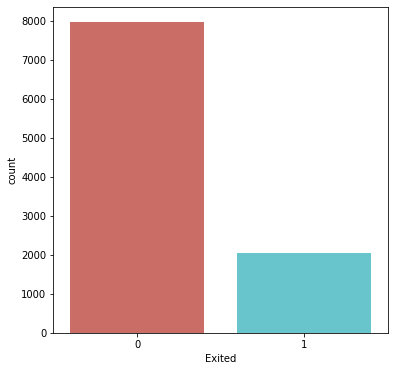

In [22]:
sns.countplot(x='Exited', data=data, palette='hls')
plt.show()

In [46]:
count_retain = len(data[data['Exited']==0])
count_churn = len(data[data['Exited']==1])
percent_retain = count_retain/(count_retain+count_churn)
print("Percent of Retained Customers", percent_retain*100)
percent_churn = count_churn/(count_retain+count_churn)
print("Percent of Churned Customerns", percent_churn*100)

Percent of Retained Customers 79.63
Percent of Churned Customerns 20.369999999999997


In [47]:
# Question : What can you say about our dataset, given `Exited` is the target?

# SC
# Dataset iss imbalance

We create **`train`**, **`test`** , and **`val`** sets.

In [50]:
# Split and shuffle our dataset.
train_data, test_data = train_test_split(data.copy(), test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Form np arrays of labels and features.
y_train = np.array(train_data.pop('Exited'))
bool_y_train = y_train != 0
y_val = np.array(val_data.pop('Exited'))
y_test = np.array(test_data.pop('Exited'))

X_train = np.array(train_data)
X_val = np.array(val_data)
X_test = np.array(test_data)

We normalize our input features using `StandardScaler()`. This will set the mean to `0` and standard deviation to `1`. 

In [51]:
# Question : What does StandardScaler do to our data?

# SC


In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = np.clip(X_train, -5, 5)
X_val = np.clip(X_val, -5, 5)
X_test= np.clip(X_test, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (6400,)
Validation labels shape: (1600,)
Test labels shape: (2000,)
Training features shape: (6400, 12)
Validation features shape: (1600, 12)
Test features shape: (2000, 12)


In [52]:
X_train.shape

(6400, 12)

In [53]:
y_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

### 2.1. Logistic Regression on `sklearn`

Let's deal with the problem by first using the `Logistic Regression` class of `sklearn`. 


In [54]:
# Instantiate an sklearn model for logistic regression
model_lr = LogisticRegression()

In [55]:
# Start training
model_lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Use trained model to predict on test dataset
y_pred = model_lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


### 2.2. Logistic Regression with Neural Networks 

Below we try to solve the same problem, but this time we make use of an Artificial Neural Network. An example of instantiating a model object with the `Keras` API is given. Several `layers` are added to the `modelA`. We will discuss each line thoroughly as we go along the discussion. For now, take a look at how `modelA` is constructed. 

In [57]:
X_train.shape

(6400, 12)

In [56]:
 # Instantiate modelA
modelA = keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,   activation='sigmoid')
        
  ])

# Compile modelA
modelA.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Prepare training modelA log storage
logdirA = os.path.join("logs","modelA", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackA = tf.keras.callbacks.TensorBoard(logdirA, histogram_freq=1)


# Train modelA
historyA = modelA.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackA])


# Evaluate modelA
modelA.evaluate(X_test, y_test)

# Use trained modelA to predict on test dataset
modelA.predict(X_test)


Epoch 1/20
64/64 [==============================] - 2s 24ms/step - loss: 3934.3828 - accuracy: 0.2036 - val_loss: 2537.3701 - val_accuracy: 0.2144
Epoch 2/20
64/64 [==============================] - 0s 7ms/step - loss: 1639.1605 - accuracy: 0.2036 - val_loss: 811.6884 - val_accuracy: 0.2144
Epoch 3/20
64/64 [==============================] - 0s 4ms/step - loss: 272.7307 - accuracy: 0.4112 - val_loss: 22.5173 - val_accuracy: 0.7856
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 4.0759 - accuracy: 0.6787 - val_loss: 0.8777 - val_accuracy: 0.7856
Epoch 5/20
64/64 [==============================] - 0s 4ms/step - loss: 0.5767 - accuracy: 0.7908 - val_loss: 0.5668 - val_accuracy: 0.7856
Epoch 6/20
64/64 [==============================] - 0s 4ms/step - loss: 0.5617 - accuracy: 0.7964 - val_loss: 0.5575 - val_accuracy: 0.7856
Epoch 7/20
64/64 [==============================] - 0s 4ms/step - loss: 0.5761 - accuracy: 0.7844 - val_loss: 0.5565 - val_accuracy: 0.7856
Epoch

array([[0.02096617],
       [0.22802004],
       [0.0007104 ],
       ...,
       [0.00779364],
       [0.05923063],
       [0.06187335]], dtype=float32)

# 3. Components of Artificial Neural Networks

### 3.1. Neural Network Attributes

Each of the layers in the neural network is a **tensor operation (e.g. addition, multiplication, etc.)** applied to tensors of numeric data. 

```python
    modelA = keras.Sequential([
        tf.keras.layers.Dense(24, activation='relu', input_shape=[len(X_train.keys())]),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1,  activation='sigmoid')
      ])
``` 
These layers are stacked on top of each other in a **`Sequential`** manner as shown below. Each circle is considered a **`neuron`** OR **`unit`**.

<img src="./images/nn_bias_hidden.png" style="height: 300px;" align=left> 

Notice that all neurons/units are connected to each one of the preceding layer. A layer with this configuration is called a **Fully-connected Layer** OR a **Densely-Connected Layer**, hence the call `tf.keras.layers.Dense`.

Take for example this one layer and its output:

```python
tf.keras.layers.Dense(24, activation='relu')`
```
The input data is transformed by the layer as follows: 

 `(3.2) output = relu(dot(W, input) + b)`
 
We intepret this function as one that feeds on a 2D tensor and returns a 2D tensor. Here `W` is a 2D tensor and `b` is a vector. 



In [58]:
# Question : Identify the tensor operations used in equation (3.2)

# SC



In the corresponding network graph above, **`X`** correspond to the `features`. In our churn data example there are `12` columns corresponding to `12 features`. Therefore, there are `12 units` in the input layer. There are `24 units` for the first hidden layer, another `24 units` for the second hidden layer and `1 unit` for the output layer. There are additional `3 units` of `b`, one for each hidden and output layer. 

**`W`** and **`b`** are tensor attributes of the layer. These attributes are called **weights** OR **trainable attributes**. Each arrow you see carries a weight. Everytime the neural network is exposed to new data, these attributes are updated. They store all the information **learned** by the network during **training**.  Imagine the **`W`** (**kernels**) as knobs or buttons that we can tweak to correctly predict the churn of customers. On the otherhand, **`b`** (**bias**) does NOT interact with the input data. Furthermore, it has a weight = `1`. You'll often see `b` written as `Wo`. It is a tensor of constant values that gives us some data-independent prefences of a class over the other. 

### 3.2. Counting Trainable Parameters for Fully Connected Layers

In [ ]:
# Question : In our churn prediction neural network, how many are our trainable parameters?
# Hint: Connections between layers + bias connections in each layer

# SC

In [72]:
temp_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, input_shape=(12,)),
    tf.keras.layers.Dense(2), 
    tf.keras.layers.Dense(1,)
])

In [73]:
temp_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 26        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Question : How many trainable parameters are there if we have 3 feature columns, a hidden layer of 5 units, and output layer with 3 units?


# SC

In [ ]:
# Question : How many trainable parameters are there if we have 10 feature columns, a hidden layer of 2 units, and output layer with 1 units?


# SC

### 3.3. Feed Forward

Recall that we defined above `EPOCHS = 10`. An epoch is also called a **training loop**.

Based from the previous network graph, the information travels from the input layer to the output layer and the process follows the following steps
<br>
**Feedforward**:

1. Gather the training samples `X` and corresponding targets `y`. 
2. Calculate the `dot` product of `X` and `W` :  `dot(W, X) + b`
3. Pass the result to an **activation function** :  `relu(dot(W,X) + b)`

### 3.3.1 Activation Functions

Going back to the network we've just constructed:

```python
    tf.keras.layers.Dense(2, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
```

The `relu()` and `sigmoid()` are examples of **Activation Functions**. 
<br>
We show below how each activation function processes input data.

#### 3.3.1.1. Rectified Linear Unit - RELU

The RELU activation function is thresholded at 0. If `x<0`, it is "squashed" to zero. If `x>0`, it follows a line with `slope=1`. It’s NOT Linear, but it’s used to introduce linearity. It provides the same benefits as Sigmoid,
but with better performance.

**When to use:** Can be used only in the hidden layers.

Text(0.5, 1.0, 'ReLU Function')

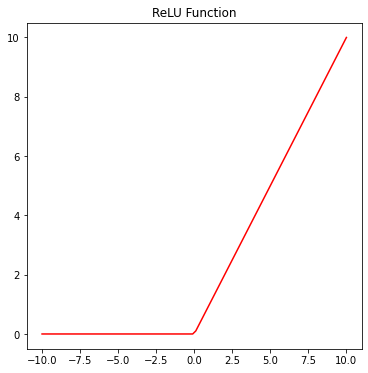

In [74]:
def relu(z):
    return np.maximum(z, 0) 

import matplotlib.pyplot as plt
import numpy as np

input_ = np.linspace(-10, 10, 100)
plt.plot(input_, relu(input_), c="r")
plt.title("ReLU Function")

#### 3.3.1.2. Sigmoid

It takes a real-valued number and "squashes" it into range between 0 and 1. Large negative numbers become 0 and large positive numbers become 1.

**When to use:** If we have to predict the probability of observation.
<br>
**Note:** The probability of anything exists only between (0 to 1).

Text(0.5, 1.0, 'Sigmoid Function')

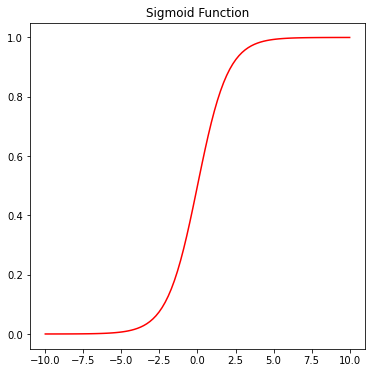

In [75]:
# define the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

input_ = np.linspace(-10, 10, 100)
plt.plot(input_, sigmoid(input_), c="r")
plt.title("Sigmoid Function")

#### 3.3.1.3. Softmax

Generalization of the Sigmoid function.

**When to use:** If we have a multiclass problem.
<br>
**Note:** The sum of probabilities of observation is 1.

Text(0.5, 1.0, 'Softmax Function')

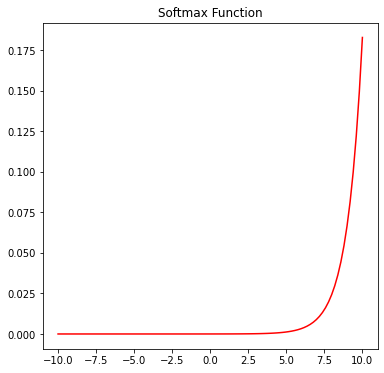

In [76]:
# define a softmax function
def softmax(x):
    e_x = np.exp(x-np.max(x)) 
    return e_x /e_x.sum()

input_ = np.linspace(-10, 10, 100)
plt.plot(input_, softmax(input_), c="r")
plt.title("Softmax Function")


#### 3.3.1.4. Hyperbolic Tangent

Negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).

**When to use:** When doing a classification between `2` classes.
<b>

In [ ]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
                                   
input_ = np.linspace(-10, 10, 100)
plt.plot(input_, tanh(input_), c="r")
plt.title("Hyperbolic Tangent")

In [ ]:
# Question : What happens to our network if we do not use non-linear Activation Functions? 


# MC
# Tensor operations reduce to  y = dot(W, input) + b. 
# Network collapses to linear and is not able to capture non-linearity. 

Now that we have discussed the forward propagation of information and activation functions, we are now ready to tackle the following steps:

4. Compute the **cost of the network, `J`** on the batch, a measure of the difference between `y_pred` and `y`.
5. Using **`Gradient Descent`**, find the values of `W` and `b` that minimizes the cost `J`.
6. Update all`W` and `b` simultaneously.

### 3.4. Loss Function (Objective Function)

`W` and `b` are intialized with small random values (*random initialization*). The initial outputs or representations are rarely useful. These weights are gradually adjusted based from the feedback signal. We repeat Feedforward and Backpropagation in a loop until we get `y_pred` that is close enough to `y`. The network learns to map the input to correct target (labels). This process of adjustment is called **training**. 

We will now discuss the rest of the gears of a neural network. 

In [ ]:
# Question 6: What type of machine learning (Supervised or Unsupervised) was described by the steps above?

# MC
# Supervised Machine Learning

The **Loss Function** determines how good our predicted label `y_pred` with respect to the true label `y` for a **single training example**. That means we want to minimize this loss. A usual form we know is half of the square difference between the predicted value `y_pred` and true value `y`:

In [77]:
# Define a sum of squared error function
def ss_loss(y, y_pred):
    return 1/2*np.sum((y - y_pred)**2)

y = np.array([0., 0., 1., 1.])
y_pred = np.array([1., 1., 1., 0.])

print("Sum of Squared Losses:", ss_loss(y,y_pred))

Sum of Squared Losses: 1.5


The image below shows an example plot of `W0` and `W1`. The height shown by the solid black arrow indicate the error (loss) between `y_pred` and `y`. Our aim is to find a combination of values of `W0` and `W1` such that the error is small enough. 

<img src="./images/nn_loss.png" style="height: 300px;" align=left> 

Image Credit ([Source](https://www.eecs.wsu.edu/~cook/dm/lectures/l5/node10.html))

While the Loss Function determines the error for one training example, the **Cost Function** on the other hand measures how well the network is doing for the **entire training set**.

Recall the line above where we compiled our model.

```python
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
```
We used the `BinaryCrossentropy`. An example of how this function computes the loss is given below. 

In [78]:
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([0., 0., 1., 1.], [1., 1., 1., 0.])
print('Loss: ', loss.numpy())

Loss:  11.522856


Which loss function to use is highly dependent on the problem at hand. For instance: <br> 
- **mean- squared error** for a **regression problem**
- **binary crossentropy** for a **two-class classification problem** <br> 
- **categorical crossentropy** for a **multi-class classification problem** <br> 
- **connectionist temporal classification (CTC)** for a **sequence-learning problem**



[You may check-out different `tf.keras.losses` functions and usage.](https://www.tensorflow.org/api_docs/python/tf/keras/losses) 

### 3.5. Gradient Descent

**I. In our churn prediction network, how do we know if we should increase or decrease each of the `35` coefficients and by how much?** 
<br> One way is to tweak `1` of the coefficients and freeze the remaining `34`. Say the one we are tweaking has an initial value `W=0.2`. After one loop of passing the batch to the network, we have `loss=0.5`. We update the value to `W=0.3` and do a second feedforward. This time `loss=0.6`. We then update the coefficient to `W=0.35` and the loss drops to `loss=0.2`. This means we need to change `W` by `-0.05` to minimize the `loss`. If we do the same to the other `34` coefficients, we'll find it very inefficient, expensive, and time-consuming. Later we're to deal with networks having *thousands to millions* of trainable parameters! <br>  

**II. How do we make our entire network from having high loss to low loss?** <br>
All of the tensor operations in our previous network are **differentiable** having tractable **gradients**. We can solve for the **derivative** of loss with respect to the coefficients, i.e. compute how the loss changes with respect to the change of weights, and update the weights we feed into the network accordingly. 
All along we are solving an **Optimization** problem. One algorithm that solves such problem is called **Gradient-based Optimization** OR **Gradient Descent**.  <br>

<img src="./images/nn_local.png" style="height: 300px;" align=left> 

For simplicity, instead of `(3.2)`,  we use equation `(3.3)` to get the `y_pred`. <br>
**` (3.3) y_pred = dot(W, x) + b`** <br>

The loss value is a function of both `y_pred` and `y`.  <br>
**` (3.4) loss_value = loss(y_pred,y)`** <br>

If `x` and `y` are frozen, the loss value is a function of `W`. This means we can map the losses from the coefficients `W`. <br>
**` (3.5) loss_value = L(W)`** <br>

The derivative of `L` in the point `Wo` is a tensor gradient, having the same shape as `W`: <br>
**` (3.6) derivative(L)(Wo) = gradient(L)(Wo)`**

**`gradient(L)(Wo)`** can be interpreted as tensor describing the **curvature** of `f(W)` around `Wo`. 

**III. How do we update `Wo` to achieve lowest loss?** <br>
If **`gradient(L)(Wo)`** is NEGATIVE, a small positive change in **`Wo`** causes a DECREASE in **`L`**. <br>
If **`gradient(L)(Wo)`** is POSITIVE, a small positive change in **`Wo`** causes a INCREASE in **`L`**. <br>
The magnitude or absolute value of **`gradient(L)(Wo)`** tells us how quickly `L` will change. 

We move **`Wo`** a little in the OPPOSITE direction of **`gradient(L)(Wo)`**, i.e. if the gradient is positive, we move `Wo` towards lower values; if the gradient is negative, we move `Wo` towards positive values until we reach the optimum value of `Wo` that will give the lowest loss `L`. In equation form: <br>
**`(3.7) Wo -= learning_rate*gradient(L)(Wo)`**

We don't want to get too far from the initial value `Wo` and the `learning_rate` helps manage that condition. 

<img src="./images/nn_learning_rate.png" style="height: 300px;" align=left> 

### 3.5.1. Learning Rate

The choice of **`learning_rate`** or step-size has implications to the learning of the network. As shown in the figure above, we opt to take a step-size that  will help the training to converge. It follows that if the step-size is too small, training will take a long time before the network reaches the lowest loss possible (global minimum). A step-size that is too large may cause the network to NOT converge at all. 

### 3.6. Backpropagation

We've considered above a case of data flowing in a forward pass without an activation function : given `x` we calculate `y_pred = dot(Wo,x)`, compute the loss `L`, solve for the tensor `gradient(L)(Wo)`, and update `Wo` accordingly. Now we consider having an activation function as intermediate layer that feeds on the input `x`. 

**I. How do we update `W` of the network?**

<img src="./images/nn_feedforward.png" style="height: 300px;" align=left> 

### 3.6.1. Chain Rule


Assuming that the activation function used above is RELU, the network is described by the following:

**`f(W) = relu(dot(W,X) + b)`** <br>
**`f(W) = y_pred`** <br>
**`loss_value = loss(y_pred,y)`** <br> 

But this time **`L`** is not explicitly a function of **`W`**. Instead, it is a function **`relu(z)`**, where **` (3.8) z=dot(W,X) + b`**.

**`(3.9) loss_value = L(relu)`** <br> 
**`(3.10) derivative(L)(relu) = gradient(L)(relu)`** <br>

We can map the value of `relu` with the function `z`

**`(3.11) relu_value = relu(z)`**<br>
**`(3.12) derivative(relu)(z) = gradient(relu)(z)`** <br>

We see now that we can map the values of `z` with `W` <br>
**`(3.13) z_value = z(W)`**<br>
**`(3.14) derivative(z)(W) = gradient(z)(W)`** <br>

**Chain rule** states that we can compute for the derivative of `L` with respect to `W` by:  <br> 

**`(3.15) derivative(L)(W)  =  derivative(L)(relu) * derivative(relu)(z) * derivative(z)(W) * `**

And so the value for the gradient is: <br>
**`(3.16) gradient(L)(W)  =  gradient(L)(relu) * gradient(relu)(z) * gradient(z)(W) * `**

We can now update **`W`** as follows: <br>
**`(3.17) W -= learning_rate*gradient(L)(W)`**

### 3.6.2. Mini-batch Stochastic Gradient Descent

In cases where we have tens of millions of parameters/coefficients (like in high-definition image data), we may want to run our training in `mini-batches`. Our pipeline will then go through the following steps:

1. Draw a batch of training samples `X` and corresponding targets `y`.
2. Run the network on `X` to obtain predictions` y_pred`.
3. Compute the loss of the network on the batch, `L(y_pred,y)`.
4. Compute the gradient of the loss with regard to the network’s parameters `gradient(L)(W) `  (backpropagation).
5. Move the parameters a little in the opposite direction from the gradient—`W -= step * gradient`- reducing the loss on the batch a bit.


Instead of the usual `Gradient Descent`, here we use `Mini-batch Stochastic Gradient Descent (SGD)`. The `stochastic` term comes from the fact that each batch is chosen in `random` manner. 

### 3.6.3. Optimizers

We just saw that we can use  optimizers such as `Gradient Descent` and its variant `Mini-batch Stochastic Gradient Descent`. Other optimizers offered by Tensorflow [can be found in this page.](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)


### 3.6.4. The Vanishing Gradient Problem

The gradient in equation **`3.16`** tends to become smaller and smaller as it feedbacks to the layers of a very deep network. This is the **_Vanishing Gradient Problem_**. When **`gradient(L)(W)`** becomes very small, it follows that the weight given by equation **`3.17`** doesn't update. Thus, the network stops learning. 


# 4. Artificial Neural Networks Architecture

### 4.1. Network Layers

We are now ready to discuss thoroughly the binary classifier model we built above. <br>
The layers below, when combined, become a **_network_** or **_model_**. Here we are still preparing our network prior any training.

```python
    modelA = keras.Sequential([
        tf.keras.layers.Dense(2, activation='relu', input_shape=[len(X_train[0])]),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1,   activation='sigmoid')

      ])
    ```

 The type of layer to be used should be appropriate to `tensor` format and datatype. Below are real-world examples of  `tensor` datatypes. <br> 

- Vector Data: **`2D tensors`** with shape `(samples, features)` 
- Timeseries or Sequence Data: **`3D tensors`** with shape `(samples, timesteps, features)` 
- Images: **`4D tensors`**  with shape `(samples,height,width,channels)`
- Video: **`5D tensors`**  with shape `(samples, frames, height, width, channels)`

In [ ]:
# Question 6: Identify the tensor data type and shape of our churn train dataset. 

# SC

Another way of looking at stacking **compatible** layers is creating a multi-stage data transformation pipeline. The network should follow a strict layer compatibility since one layer will only process an input tensor of certain shape and output a tensor that also has a certain shape. Again, take a look at this example: <br>

 **` (4.1) tf.keras.layers.Dense(2, activation='relu', input_shape=[len(X_train[0])])`**
 
Note that every input data has a **`input_shape=[len(X_train[0])] =[12]`**. <br>
We are creating a layer that accepts a `2D tensor` where the first dimension is `(12,)`. <br>
This layer outputs a first dimension transformed from `(12,)` to `(2,)`. 

The second layer connected to the layer above, therefore, should accept a `2D tensor` having a first dimension of `(2,)`. <br>

**` (4.2) tf.keras.layers.Dense(2, activation='relu')`**

Keras layers are dynamically compatible. We need not define the input shape for the second layer because it already assumes that the input shape is the same as the shape of the layer output preceding it. The `summary` class provides a useful look-up of each layer's output shape as well as the total number of trainable parameters.  

In [ ]:
# Print the model summary
modelA.summary()

### 4.2. Network Compilation

During the compilation, we configure the learning process. Here we specify our **`optimizer`**. It determines how the network (trainable parameters) will be updated by a variant of stochastic gradient descent. We also define the **`loss (objective) function`** which is used as a feedback signal for learning the weight tensors `W`. 

```python
    modelA.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    ```

### 4.3. Network Training

The network will start to iterate on the training data `10` times. One epoch is one iteration over all the training data. At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights accordingly. After these `10` epochs, the network will have performed `350` gradient updates (`35` per epoch), and the loss of the network will be sufficiently low that the network will be capable of predicting the churn. Below, we now define the `batch_size=100`. The network will start to iterate on the `train_dataset` in `100` mini-batches, `10` times over. The training results is stored in a container call `historyA`. 

 ```python
    historyA = modelA.fit(X_train, y_train,
                        epochs=20, 
                        batch_size=100,
                        validation_data=(X_val, y_val), 
                        verbose=1,
                        callbacks=[tensorboard_callbackA])
```

Tensorflow offers  **TensorBoard** , an elegant visualization toolkit that allows us to track the experimentation results. We added more lines to our code above: we first define **`logdirA`** which will house all our training **`logsA`**.
Later we'll see how we can use this historical logs for future experiments. Second, we set our training **`callback`** to **`tensorboard_callbackA`**.

  ```python
logdirA = os.path.join("logsA", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackA = tf.keras.callbacks.TensorBoard(logdirA, histogram_freq=1)

```

We start the **TensorBoard** within the notebook using magics. We can even start it *prior* training to monitor progress. This extension will be very useful once we deal with high dimensional tensor data where the output of hidden layers is not intuitive. 

In [79]:
%tensorboard --logdir=logs

### 4.4. Network Evaluation

We check how our model fair with the `X_test` and `y_test`. The `evaluate` class always have the first element `[0]` as  **`loss`**. You'll see later that we can add and evaluate on more metrics other than `loss` and `accuracy`. 

 ```python
modelA.evaluate(X_test, y_test)
loss = modelA.evaluate(X_test, y_test)[0]
```

### 4.5. Network Prediction

With the trained model, we can now use it to predict new samples. 

```python
modelA.predict(X_test)
 ```
 

---

## Exercise 1:


Go back to the churn dataset. Construct your another network that will predict **`Exited`**. 

1. Make use of the previously-prepared `X_train`, `y_train`, `X_test` and `y_test`.

2. Construct the model such that you have the following layers stacked in `Sequential` manner. Name it **`modelB`**. 

` Dense, 32 units, relu
 Dense, 32 units, relu
 Dense, 2 unit, softmax
  `
3. How many trainable parameters/coefficients do you have? Compare it with the `modelA` we created above. 

4. Compile your model using the following hyperparameters: <br>

```python
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        optimizer=tf.keras.optimizers.RMSprop( learning_rate=0.01, 
                                               rho=0.8, momentum=0.01, 
                                               epsilon=1e-07, 
                                               centered=False, 
                                              metrics=['accuracy'])

```
5. Create a `logsB` directory object and `tensorboard_callbackB` for your `modelB`.

6. Train your model on the `X_train` and `y_train`. Assign the results of `historyB = modelB.fit()`. <br>
   The rest of the parameters remain except the following: <br>
    - Use **`epochs=20`** and add **`batch_size=100`** parameter. 
    
7. Evaluate your `modelB`. 
   Launch your **`TensorBoard`** to monitor the performance of your `modelB`. 
    
8. Vary your network's number of `Dense` layers and `units` and try to change the `modelB.compile` configuration. <br>   Check how the results change with its variation. 

10. Compare the outputs of `modelA` and `modelB`. How do you you interpret each of the result of their output layers?     What if the output layer is just a `Dense` layer without activation function?

In [105]:
# 2. Construct the model such that you have the following layers stacked in Sequential manner. Name it modelB.
# SC

modelB = tf.keras.Sequential([
        
    tf.keras.layers.Dense(32, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid' )
        
  ])


In [120]:
# 3. How many trainable parameters/coefficients do you have?

# SC
modelB.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 66        
Total params: 1,538
Trainable params: 1,538
Non-trainable params: 0
_________________________________________________________________


In [107]:
# 4. Compile your model using the following hyperparameters

# SC
modelB.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, 
                                                    rho=0.8, 
                                                    momentum=0.01, 
                                                    epsilon=1e-07,
                                                    centered=False),
               metrics=['accuracy'])





In [121]:
# 5. Create a new logs_reg directory where you store your training logs for model_reg. Set your tensorboard_callback_reg.

# SC

logDirB = os.path.join("logs", "modelB", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackB = tf.keras.callbacks.TensorBoard(logDirB, histogram_freq=1)

In [122]:
# 6.Train your model on the train_data and test_data. The rest of the parameters remain except the following

# SC
historyB = modelB.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackB])


Epoch 1/20
64/64 [==============================] - 2s 36ms/step - loss: 0.5069 - accuracy: 0.7964 - val_loss: 0.5413 - val_accuracy: 0.7856
Epoch 2/20
64/64 [==============================] - 1s 8ms/step - loss: 1.4979 - accuracy: 0.7912 - val_loss: 0.5367 - val_accuracy: 0.7856
Epoch 3/20
64/64 [==============================] - 1s 12ms/step - loss: 2.9194 - accuracy: 0.7964 - val_loss: 0.5427 - val_accuracy: 0.7856
Epoch 4/20
64/64 [==============================] - 1s 11ms/step - loss: 0.5053 - accuracy: 0.7964 - val_loss: 0.6528 - val_accuracy: 0.7856
Epoch 5/20
64/64 [==============================] - 1s 10ms/step - loss: 0.6601 - accuracy: 0.7955 - val_loss: 0.5496 - val_accuracy: 0.7856
Epoch 6/20
64/64 [==============================] - 1s 11ms/step - loss: 0.6107 - accuracy: 0.7964 - val_loss: 0.5331 - val_accuracy: 0.7856
Epoch 7/20
64/64 [==============================] - 1s 9ms/step - loss: 0.5063 - accuracy: 0.7964 - val_loss: 0.5515 - val_accuracy: 0.7856
Epoch 8/20
64/6

In [110]:
# 7. Evaluate your `modelB`. 
modelB.evaluate(X_test, y_test)


63/63 [==============================] - 1s 3ms/step - loss: 0.4927 - accuracy: 0.8045


[0.4927012324333191, 0.8044999837875366]

In [111]:
loss = modelB.evaluate(X_test, y_test)[0]

63/63 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.8045


In [112]:
modelB.predict(X_test)

array([[0.6701729 , 0.32982707],
       [0.6701729 , 0.32982707],
       [0.6701729 , 0.32982707],
       ...,
       [0.6701729 , 0.32982707],
       [0.6701729 , 0.32982707],
       [0.6701729 , 0.32982707]], dtype=float32)

In [123]:
# 8. Compare the outputs of modelA and modelB. How do you you interpret each of the result of their output layers?

# SC 
%tensorboard --logdir=logs

Reusing TensorBoard on port 6006 (pid 12628), started 0:54:37 ago. (Use '!kill 12628' to kill it.)

**`modelA`**: 


**`modelB`**: 


**`Dense without Activation Function`**: 

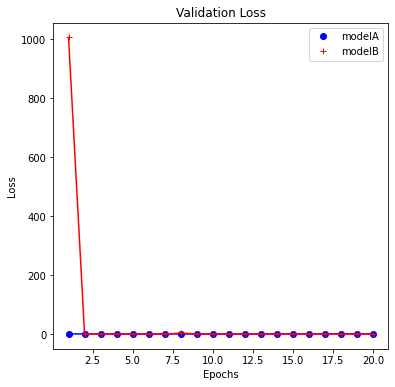

In [114]:
compareValLoss(historyA, historyB, 'modelA', 'modelB')

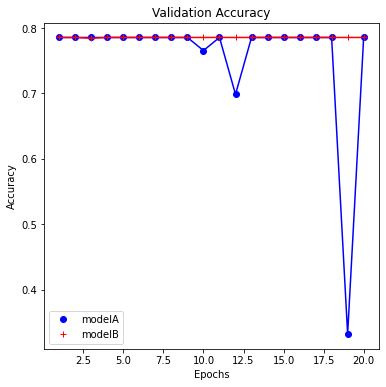

In [115]:
compareValAcc(historyA, historyB, 'modelA', 'modelB')

---

## 5. Improving Neural Network Performance

We can further improve our artificial neural network performance. <br> 
Listed below are some of the commonly-used modification to keep the model from overfitting.

### 5.1. Adding more training data
Deep neural networks perform better with high-volume data. 

 ### 5.2. Reduce  network capacity
We saw in the Exercises that the accuracy of the network plateaus at a certain value. Moreover, we see a difference between training and validation performance. When our network has more capacity compared to the amount of training data we have, our network largely overfits our data. Having fewer `units`, like our first neural network may handle the churn data better than our neural network because it may overfit less. 

### Recall on Metrics

There are few metrics that can also be computed and are helpful in evaluating model performance. 

*   **`False Negatives`** and **`False Positives`** are samples that were **incorrectly** classified
*   **`True Negatives`** and **`True Positives`** are samples that were **correctly** classified
*   **`Accuracy`** is the percentage of examples correctly classified <br>  
*   **`Precision`** is the percentage of **predicted** positives that were correctly classified <br>
*   **`Recall`** is the percentage of **actual** positives that were correctly classified <br>
*   **`AUC`** refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). This metric is equal to the probability that a classifier will rank a random positive sample higher than than a random negative sample.

**NB**: We can have `99.8%+` accuracy on this task by predicting False all the time. Hence, accuracy is not always useful.

In [116]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [117]:
EPOCHS = 20
BATCH_SIZE = 2048

We now build our baseline model inside a function to allow re-usability during experimentation. 

In [118]:
def build_model(metrics = METRICS, output_bias=None):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=[len(train_data.keys())]),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid', 
                                 bias_initializer=output_bias)
             ])

    model.compile(
          optimizer=tf.keras.optimizers.Adam(lr=1e-3),
          loss=tf.keras.losses.BinaryCrossentropy(),
          metrics=METRICS)
    
    return model

## Exercise 2:

Build and name `modelC` using the `build_model` function above.

In [ ]:
# SC
... = ...
... = ...evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

### 5.3. Initializing Output Layer Bias

We know that our data is **IMBALANCED** and that the initial bias of the network is rarely correct. <br>
We can set the initial bias in our `output layer` to reflect the imbalance. This can also help the network reach convergence.

In [ ]:
init_bias = np.log([count_churn/count_retain])
output_bias = tf.keras.initializers.Constant(init_bias)
print("Initial Bias: {}".format(init_bias[0]))

## Exercise 3:

1. Build another model named `modelD`. Make use of the `output_bias` above. 
2. Compare the loss of `modelC` and `modelD` if the bias initialization helped. 

In [ ]:
# SC 

# 1. 
... = build_model(output_bias=output_bias)
... = ...evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

In [ ]:
modelD_eval

We keep the initial weights in a `checkpoint file`, and load them into each model before training. <br> 
By doing so we can **compare various training runs**. 

In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
modelD.save_weights(initial_weights)

In [ ]:
# SC

# 2. 
print("modelC Loss:{}".format(modelC_eval[0]))
print("modelD Loss:{}".format(modelD_eval[0]))

## Exercise 4:

1. Build `modelE` using the `initial_weights` above. However, set the `output` layer bias to `0.0`. 
2. Set-up your `tensorboard_callback` and `logdir` for `modelE`.
2. Fit `modelE` and assign it to `zero_bias_history`

In [ ]:
# SC

# 1. 
...= build_model()
....load_weights(initial_weights)
....layers[-1].bias.assign([0.0])

# 2. 
... = os.path.join("logs", "...", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
... = tf.keras.callbacks.TensorBoard(..., histogram_freq=1)

# 3. 
zero_bias_history = modelE.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=0,
    callbacks = [...] )

## Exercise 5:

1. Build `modelF` using the `initial_weights` above without changing the `output` layer bias.
2. Set-up your `tensorboard_callback` and `logdir` for `modelF`.
2. Fit `modelF` and assign it to `careful_bias_history`

In [ ]:
# SC

# 1. 
... = build_model()
....load_weights(initial_weights)

# 2. 
... = os.path.join("logs", "...", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
... = tf.keras.callbacks.TensorBoard(..., histogram_freq=1)

# 3. 
... = ....fit(
     X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val), 
    verbose=0,
    callbacks = [...])

In [ ]:
compareValLoss(zero_bias_history, careful_bias_history, 'Zero Bias', 'Careful Bias')

We see from the comparative plot that the model with careful initialization **`modelF`** has smaller `loss`. Let's use it in our actual training. 

There are other callbacks that we can add to our training.  <br>
The **Early Stopping Callback** allows us to stop the training when a monitored quantity has **stopped improving**. <br>
The **patience** parameter is the amount of epochs to check for improvement.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

## Exercise 6:

1. Build `modelG` using the `initial_weights` above without changing the `output` layer bias.
2. Set-up your `tensorboard_callback` and `logdir` for `modelF`.
2. Fit `modelF` and assign it to `baseline_history`. Don't forget to add `early_stopping` to your `callbacks`.

In [ ]:
# SC

# 1. 
... = build_model()
....load_weights(initial_weights)

# 2. 
... = os.path.join("logs", "...", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
... = tf.keras.callbacks.TensorBoard(..., histogram_freq=1)

# 3. 
baseline_history = modelG.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val), 
    verbose=0,
    callbacks = [..., ...])

In [ ]:
plot_metrics(baseline_history)

### Metrics Evaluation

In [125]:
train_predictions_baseline = modelG.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = modelG.predict(X_test, batch_size=BATCH_SIZE)

NameError: name 'modelG' is not defined

In [ ]:
baseline_results = modelG.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(modelG.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

The ROC plot shows at a glance the range of performance the model can reach just by tuning the output threshold.

In [126]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

NameError: name 'train_predictions_baseline' is not defined

<!-- It looks like the precision is relatively high, but the recall and the area under the ROC curve (AUC) aren't as high as you might like. Classifiers often face challenges when trying to maximize both precision and recall, which is especially true when working with imbalanced datasets. It is important to consider the costs of different types of errors in the context of the problem you care about. In this example, a false negative (a fraudulent transaction is missed) may have a financial cost, while a false positive (a transaction is incorrectly flagged as fraudulent) may decrease user happiness. -->



### 5.4. Add weights to class

The goal is to identify churned customers, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

In [124]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
total = count_retain+count_churn

weight_for_0 = (1 / count_retain)*(total)/2.0 
weight_for_1 = (1 / count_churn)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


Now we try re-training and evaluating the model with weighted class to see how that affects the predictions.

## Exercise 7:

1. Build `weighted_model` using the `initial_weights` above without changing the `output` layer bias.
2. Assign the training of `weighted_model` to `weighted_history`. Don't forget to add `early_stopping` to your `callbacks`. Assign values to `class_weight`. 
3. Use `plot_metrics` on `weighted_history`
4. Use `weighted_model` to predict both on `X_train` and `X_test`
5. Evaluate `weighted_model` and assign result to `weighted_results`

In [ ]:
# SC

# 1. 
... = build_model()
....load_weights(initial_weights)

# 2. 
... = ....fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [...],
    validation_data=(X_val, y_val),
    # The class weights go here
    class_weight=class_weight) 

# 3. 
plot_metrics(...)

# 4. 
train_predictions_weighted = ....predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = ....predict(X_test, batch_size=BATCH_SIZE)

# 5. 
... = ....evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)

In [ ]:
for name, value in zip(weighted_model.metrics_names, weighted_results): 
    print(name, ': ', value)
print()

In [ ]:
plt.clf()
plot_cm(y_test, test_predictions_weighted)


<!-- Here you can see that with weighted class, the accuracy and precision are lower because there are more false positives, but conversely the recall and AUC are higher because the model also found more true positives. Despite having lower accuracy, this model has higher recall (and identifies more fraudulent transactions). Of course, there is a cost to both types of error (you wouldn't want to bug users by flagging too many legitimate transactions as fraudulent, either). Carefully consider the trade offs between these different types of errors for your application. -->

### 5.5. Regularization

#### 5.5.1. L1 and L2 Regularization
A model is simple if  the distribution of parameter values has **`less entropy`**. This is achieved by having **`fewer parameters`**. Another way to mitigate overfitting is to put constraints on the weights to take only small values, making its value distribution **`more regular`**. This is called **`weight regularization`**. We penalize the network for having large weights. 

- **`L1 regularization`**: The cost added is proportional to the absolute value of the weight coefficients (the `L1 norm` of the weights).
- **`L2 regularization`**: The cost added is proportional to the square of the value of the weight coefficients (the `L2 norm or weight decay`). 

In [ ]:
# assign L1 regularizer
L1_reg = regularizers.l1(0.001) 

# assign L1 regularizer
L2_reg = regularizers.l2(0.001) 

# OR assign L1 and L2 regularizer simultaneously
L1L2_reg = regularizers.l1_l2(l1=0.001, l2=0.001)

Let's compare the difference in `val_loss` for both baseline and regularized `modelA`. 

In [ ]:
 # Instantiate modelA
modelA_L2 = keras.Sequential([
    tf.keras.layers.Dense(4, kernel_regularizer = L2_reg, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dense(4, kernel_regularizer = L2_reg, activation='relu'),
    tf.keras.layers.Dense(1,   activation='sigmoid')
        
  ])

# Compile modelA
modelA_L2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train modelA
historyA_L2 = modelA_L2.fit(X_train, y_train,
                    epochs=20, 
                    validation_split = 0.2,  
                    verbose=1)

In [ ]:
# Print the model summary
modelA_L2.summary()

In [ ]:
compareValLoss(historyA, historyA_L2, 'modelA', 'modelA L2 Regularized')

We observed that with L2 regularization, validation improved compared to the baseline model. 

#### 5.5.2. Adding Drop-out Layer

Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training.

We want units to be independently extract features from their inputs instead of relying on other neurons to do so. Suppose we have a multilayered feedforward network like this one, the yellow hidden units in the middle layer may co-adapt.  Subsets of units in a layer is randomly selected and pruned by clamping their output to zero.  This effectively removes those units from the model. A different subset of units is randomly selected every time we present a training example.

Below are two possible network configurations. On the first presentation (left), the 1st and 3rd units are disabled, but the 2nd and 3rd units have been randomly selected on a subsequent presentation. 

<img src="./images/nn_dropout.png" style="height: 200px;" align=left> 

This image was accessed from [StackExchange](https://stats.stackexchange.com/questions/201569/what-is-the-difference-between-dropout-and-drop-connect?noredirect=1&lq=1).

In [ ]:
 # Instantiate modelA
modelA_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,   activation='sigmoid')
        
  ])

# Compile modelA
modelA_dropout.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train modelA
historyA_dropout = modelA_dropout.fit(X_train, y_train,
                    epochs=20, 
                    validation_split = 0.2,  
                    verbose=1)

In [ ]:
# Print the model summary
modelA_dropout.summary()

In [ ]:
compareValLoss(historyA, historyA_dropout, 'modelA', 'modelA Dropout Regularized')

### 5.6. Configuring Learning Rates

Shown below how the learning rate can be configured. 

```python

optimizer = tf.keras.optimizers.Adam( learning_rate=0.001 )

```

## Exercise 8:

1. Use `ModelA` and use the `optimizer` above. However, use `epochs=5`. 
2. Vary the step-size as: `learning_rate=0.0001`, `learning_rate=0.01`, `learning_rate=0.8`. Compile the model and assign names to history as `historyA_LRsmall`, `historyA_LRmid`, `historyA_LRbig`, respectively. 


In [128]:
# SC
 
optimizer = tf.keras.optimizers.Adam( learning_rate=0.001 )

# Compile modelA
modelA.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train modelA
historyA_LRsmall = modelA.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackA])


Epoch 1/20
64/64 [==============================] - 2s 20ms/step - loss: 1.3123 - accuracy: 0.6934 - val_loss: 0.8293 - val_accuracy: 0.7856
Epoch 2/20
64/64 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.7445 - val_loss: 0.5979 - val_accuracy: 0.7856
Epoch 3/20
64/64 [==============================] - 0s 4ms/step - loss: 0.6324 - accuracy: 0.7559 - val_loss: 0.8299 - val_accuracy: 0.3756
Epoch 4/20
64/64 [==============================] - 0s 8ms/step - loss: 0.6171 - accuracy: 0.7603 - val_loss: 0.8059 - val_accuracy: 0.7856
Epoch 5/20
64/64 [==============================] - ETA: 0s - loss: 0.7069 - accuracy: 0.73 - 0s 7ms/step - loss: 0.6807 - accuracy: 0.7473 - val_loss: 0.5607 - val_accuracy: 0.7856
Epoch 6/20
64/64 [==============================] - 1s 12ms/step - loss: 0.5593 - accuracy: 0.7937 - val_loss: 0.5840 - val_accuracy: 0.7856
Epoch 7/20
64/64 [==============================] - 0s 5ms/step - loss: 0.5567 - accuracy: 0.7856 - val_loss: 0.5385

In [ ]:
# SC
optimizer = ...

# Compile modelA
modelA.compile(loss='binary_crossentropy',
              optimizer=...,
              metrics=['accuracy'])


# Train modelA
historyA_LRmid = modelA.fit(X_train, y_train,
                    epochs=..., 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackA])

In [ ]:
# SC
optimizer = ...

# Compile modelA
modelA.compile(loss='binary_crossentropy',
              optimizer=...,
              metrics=['accuracy'])


# Train modelA
historyA_LRbig = modelA.fit(X_train, y_train,
                    epochs=..., 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackA])

# References

Majority of discussions are based from "Deep Learning with Python" by François  Chollet. <br>
However, contents are modified to accommodate Keras in Tensorflow 2.0 Backend. <br>
Images ours, unless otherwise specified. 

1. "True vs. False and Positive vs. Negative". Machine Learning Crash Course. Feb 10, 2020.  https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative. Accessed 12 April 2020.
1. "Accuracy". Machine Learning Crash Course. Feb 10, 2020. https://developers.google.com/machine-learning/crash-course/classification/accuracy. Accessed 12 April 2020.

1. "Precision and Recall". Machine Learning Crash Course. Feb 10, 2020.  https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall. Accessed 12 April 2020.

1. "ROC-AUC". Machine Learning Crash Course. Feb 10, 2020.   https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc. Accessed 12 April 2020.

1. "Classification on imbalanced data." Tensorflow. Apr 04, 2020,  https://www.tensorflow.org/tutorials/structured_data/imbalanced_data. Accessed 12 April 2020.

1. Karpathy, Andrej. "A Recipe for Training Neural Networks." Andrej Karpathy blog, Apr 25, 2019, http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines. Accessed 12 April 2020.

1. Chollet, François. Deep Learning with Python. Manning, 2018.